# Predicting Unemployment Trends

## Import Libraries

In [192]:
#pip install interval

In [193]:
#pip install symbol-sdk-python

In [194]:
#pip install functions-framework

In [195]:
#pip install plotly_express==0.4.0

In [196]:
#pip install prophet

In [197]:
#pip install python-dotenv



In [198]:
import pandas as pd
import numpy as np
import requests as r
import json
from dotenv import load_dotenv
import os
from prophet import Prophet
import plotly.express as px
import flask 
import functions_framework
import symbolchain  
import interval
import matplotlib.pyplot as plt

## Import Data

In [199]:


# replace the "demo" apikey below with your own key from https://www.alphavantage.co/support/#api-key
url = 'https://www.alphavantage.co/query?function=REAL_GDP_PER_CAPITA&apikey=XX0GXLCRV5I6MRKF'
r = requests.get(url)
data = r.json()

print(data)

{'name': 'Real Gross Domestic Product per Capita', 'interval': 'quarterly', 'unit': 'chained 2012 dollars', 'data': [{'date': '2024-01-01', 'value': '67702.0'}, {'date': '2023-10-01', 'value': '67513.0'}, {'date': '2023-07-01', 'value': '67050.0'}, {'date': '2023-04-01', 'value': '66357.0'}, {'date': '2023-01-01', 'value': '66096.0'}, {'date': '2022-10-01', 'value': '65799.0'}, {'date': '2022-07-01', 'value': '65469.0'}, {'date': '2022-04-01', 'value': '65127.0'}, {'date': '2022-01-01', 'value': '65284.0'}, {'date': '2021-10-01', 'value': '65648.0'}, {'date': '2021-07-01', 'value': '64611.0'}, {'date': '2021-04-01', 'value': '64153.0'}, {'date': '2021-01-01', 'value': '63224.0'}, {'date': '2020-10-01', 'value': '62411.0'}, {'date': '2020-07-01', 'value': '61803.0'}, {'date': '2020-04-01', 'value': '57383.0'}, {'date': '2020-01-01', 'value': '62333.0'}, {'date': '2019-10-01', 'value': '63257.0'}, {'date': '2019-07-01', 'value': '62945.0'}, {'date': '2019-04-01', 'value': '62331.0'}, {'d

In [200]:
pd.DataFrame(data['data'])

,date,value
0,2024-01-01,67702.0
1,2023-10-01,67513.0
2,2023-07-01,67050.0
3,2023-04-01,66357.0
4,2023-01-01,66096.0
...,...,...
304,1948-01-01,15371.0
305,1947-10-01,15204.0
306,1947-07-01,15039.0
307,1947-04-01,15139.0


In [201]:
GDP = pd.DataFrame(data['data'])

In [202]:
GDP.dtypes

date     object
value    object
dtype: object

In [203]:
GDP['value']= GDP['value'].astype('float')


In [204]:
GDP['date']=pd.to_datetime(GDP['date'])

In [205]:
print(json.dumps(data, indent=4))

{
    "name": "Real Gross Domestic Product per Capita",
    "interval": "quarterly",
    "unit": "chained 2012 dollars",
    "data": [
        {
            "date": "2024-01-01",
            "value": "67702.0"
        },
        {
            "date": "2023-10-01",
            "value": "67513.0"
        },
        {
            "date": "2023-07-01",
            "value": "67050.0"
        },
        {
            "date": "2023-04-01",
            "value": "66357.0"
        },
        {
            "date": "2023-01-01",
            "value": "66096.0"
        },
        {
            "date": "2022-10-01",
            "value": "65799.0"
        },
        {
            "date": "2022-07-01",
            "value": "65469.0"
        },
        {
            "date": "2022-04-01",
            "value": "65127.0"
        },
        {
            "date": "2022-01-01",
            "value": "65284.0"
        },
        {
            "date": "2021-10-01",
            "value": "65648.0"
        },
     

In [206]:
# Step 1: Set your API key
API_KEY = 'XX0GXLCRV5I6MRKF'

# Step 2: Set the API URL and parameters
url = 'https://www.alphavantage.co/query'
params = {
    'function': 'REAL_GDP_PER_CAPITA',
    'apikey': API_KEY,
    'datatype': 'json'  # Assuming the data should be returned in JSON format
}


In [207]:
# Step 3: Make the API request
response = requests.get(url, params=params)
data = response.json()

# Debugging: Print the keys of the JSON response to understand its structure
print("Keys available in response:", data.keys())

Keys available in response: dict_keys(['name', 'interval', 'unit', 'data'])


In [208]:
# Step 4: Check if the expected key exists in the data
if 'data' in data:  # Adjust this key based on the actual key provided by Alpha Vantage for GDP data
    # If key exists, process the data into a DataFrame
    df = pd.DataFrame(data['data'])  # Adjust this as necessary based on the actual data structure

In [209]:


    # Handling different data types:
    # Assuming 'Date' is a column containing date strings and 'Value' is numeric
    #df['Date'] = pd.to_datetime(df['Date'])  # Convert date strings to datetime objects
    #df['Value'] = pd.to_numeric(df['Value'], errors='coerce')  # Convert values to floats, 'coerce' turns errors into NaN

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


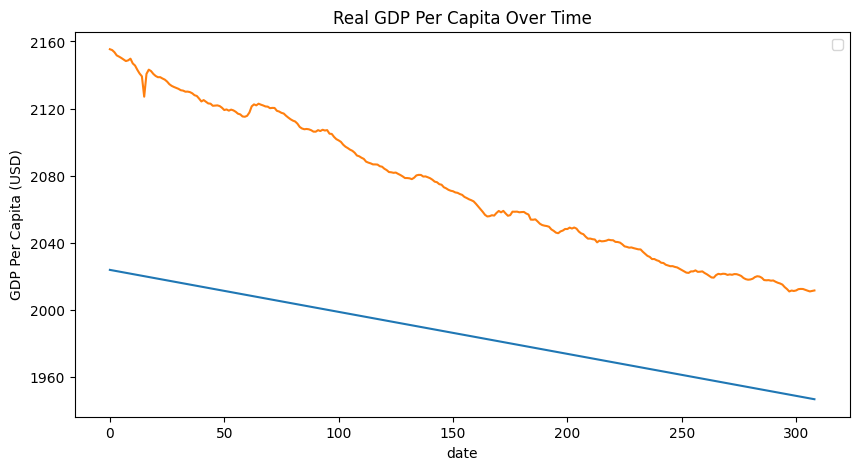

In [220]:





    # Step 5: Plot the data (adjust plot settings according to what you actually have)
plt.figure(figsize=(10, 5))
#GDP = data.loc('date', 'value')
plt.plot(GDP)
    #plt.plot(df['Year'], df['Value'], label='Real GDP per Capita')  # Adjust column names as necessary
plt.title('Real GDP Per Capita Over Time')
plt.xlabel('date')
plt.ylabel('GDP Per Capita (USD)')
plt.legend()
plt.show()
#else:
    # If the key does not exist, handle the situation
   # print("Data key for GDP data not found in the response.")
   # print("Here is the available data:", data.keys())  # Print available keys to help diagnose the issue


#### US States and Abbrevations - from file

In [ ]:
# Import a dictionary of US States and abbrevations
us_states = np.load('Resources/us_states.npy', allow_pickle='TRUE').item()
us_states

#### Unemployment data - from Federal Reserve Bank of St. Louis (FRED)

In [ ]:
# Create and empty dataframe to hold all the unemployment values
unemployment_df = pd.DataFrame()
# Load environment variables and New York Times API key
load_dotenv()
fred_api_key = os.getenv("FRED") # calling environmental variables
fred_api_key = 'f65100380bee55fc01cf4fd7e4604408'
# Display message informing the user that the download can take a minute
print('This can take a few seconds as the program is downloading data for each state...')

for key in us_states:
    # Create series ID that needs to be downloaded
    series_id = us_states[key] + 'URN'
    # Create the query url
    query_url = 'https://api.stlouisfed.org/fred/series/observations?' +\
                f'series_id={series_id}&api_key={fred_api_key}&' +\
                'file_type=json&observation_start=1980-01-01'
    # Get a reponse and convert it to json
    response = requests.get(query_url).json()
    # Create a temp dataframe to hold the values downloaded
    temp_df = pd.DataFrame(response['observations'])\
        .drop(['realtime_start', 'realtime_end'], axis=1)\
        .set_index('date')\
        .rename(columns={'value': us_states[key]}) 
    # Add the data to the unemployment_df
    # If employment_df is empty then assign the temp_df value to it
    if unemployment_df.empty:
        unemployment_df = temp_df
    # Else join unemployment_df with temp_df
    else:
        unemployment_df = unemployment_df.join(temp_df, how='outer')  

# Change index name to Date
unemployment_df.index.names = ['Date']
# Change index type to datetime
unemployment_df.index = pd.to_datetime(unemployment_df.index)

In [ ]:
# View the unemployment dataframe
unemployment_df

In [ ]:
# Check data type of the index
unemployment_df.index.dtype

In [ ]:
# Convert the data in the columns to float
unemployment_df = unemployment_df.astype('float')

In [ ]:
# Display head of unemployment dataframe
unemployment_df.tail()

In [ ]:
# Check unemployment dataframe for any null values
sum(unemployment_df.isnull().sum())

In [ ]:
# Pandemic recovery shows only three states (NV, HI and TX) are worse off in unemployment
pandemic_df = unemployment_df.loc['2020-Jan'].T.join(unemployment_df.loc['2023-May'].T)
pandemic_df['Recovery'] = pandemic_df.iloc[:,1] - pandemic_df.iloc[:,0]
pandemic_df.sort_values(by='Recovery', ascending=False).head(10)

#### PCE Inflation rate

In [ ]:
series_id ='PCETRIM6M680SFRBDAL'

In [ ]:
query_url = 'https://api.stlouisfed.org/fred/series/observations?' +\
                f'series_id={series_id}&api_key={fred_api_key}&' +\
                'file_type=json&observation_start=1980-01-01'

In [ ]:
# Get a reponse and convert it to json
response = requests.get(query_url).json()
# Create a temp dataframe to hold the values downloaded
inflation_df = pd.DataFrame(response['observations'])\
                .drop(['realtime_start', 'realtime_end'], axis=1)\
                .set_index('date')\
                .rename(columns={'value': 'Inflation'}) 
# Change index name to Date
inflation_df.index.names = ['Date']
# Check the head of the dataframe
inflation_df.tail()

In [ ]:
# Convert index to datetime
inflation_df.index = pd.to_datetime(inflation_df.index)
# Check if data type of the index
inflation_df.index.dtype

In [ ]:
# Change the data to type float
inflation_df = inflation_df.astype('float')

In [ ]:
# Check the head of the dataframe
inflation_df.head()

In [ ]:
# Check for any null values
sum(inflation_df.isnull().sum())

In [ ]:
# Visualiztion of the PCE Inflation rate
fig = px.line(inflation_df, 
        labels={'value': 'Inflation rate', 'Date': 'Year'}, 
        title='Inflation Rate vs Year')
fig.update_layout(showlegend=False)
fig.show()

#### Fed Funds Rate

In [ ]:
series_id = 'FEDFUNDS'
fedfunds_url = 'https://api.stlouisfed.org/fred/series/observations?' +\
                f'series_id={series_id}&api_key={fred_api_key}&' +\
                'file_type=json&observation_start=1980-01-01'
response = requests.get(fedfunds_url).json()

In [ ]:
fedfunds_df = pd.DataFrame(response['observations'])\
                        .drop(['realtime_start', 'realtime_end'], axis=1)\
                        .set_index('date')\
                        .rename(columns={'value': 'Fed Funds'}) 
fedfunds_df.index.names=['Date']

fedfunds_df.head()

In [ ]:
# Convert index to datetime
fedfunds_df.index = pd.to_datetime(fedfunds_df.index)
# Check if data type of the index
fedfunds_df.index.dtype

In [ ]:
# Change the data to type float
fedfunds_df = fedfunds_df.astype('float')

In [ ]:
# Check if there are any null values
sum(fedfunds_df.isnull().sum())

In [ ]:
# Visualiztion of the Fed Funds Rate
fig = px.line(fedfunds_df, 
        labels={'value': 'Fed Funds rate', 'Date': 'Year'}, 
        title='Fed Funds Rate vs Year')
fig.update_layout(showlegend=False)
fig.data[0].line.color = '#FF0000'
fig.show()

### Get the target states on which the analysis needs to be carried out

#### Filter the data for the states with the highest average unemployment over the last 10 years

In [ ]:
years = 10
unemployment_10y_df = unemployment_df.iloc[(years*-12):,:]
unemployment_10y_df

In [ ]:
# Geographically where are the unemployment is the highest and lowest over the past 10 years
fig = px.choropleth(unemployment_10y_df, 
                    locations=unemployment_10y_df.columns.tolist(), 
                    locationmode="USA-states", 
                    scope="usa", 
                    color=unemployment_10y_df.mean().tolist(), 
                    color_continuous_scale='reds', 
                    title='Unemployment in the US',
                    labels={'color':'Rate'})
fig.show()

In [ ]:
# Get the mean of each column, sort the values and get the bottom five values
highest_unemployment = unemployment_10y_df\
                            .mean()\
                            .sort_values()\
                            .tail()
highest_unemployment

In [ ]:
# Plot the states with the highest unemployment
fig = px.bar(highest_unemployment, 
             labels={'value': 'Unemployment Rate', 'index': 'State', 'color': 'Rate'},
             color=highest_unemployment,
             color_continuous_scale = 'pinkyl'
            )
fig.update_layout(showlegend=False, yaxis_range=[5,6.5])
fig.show()

In [ ]:
# Get the mean of each column, sort the values and get the bottom five values
highest_unemployment = highest_unemployment\
                            .index\
                            .tolist()
# View the list
highest_unemployment

#### Filter the data for the states with the lowest average unemployment over the last 10 years

In [ ]:
all_unemployment = unemployment_10y_df\
                            .mean()\
                            .sort_values()\
                            .index\
                            .tolist()
# View the dataseries
all_unemployment

In [ ]:
# Get the mean of each column, sort the values, get the bottom five values, get the index and convert it to a list
lowest_unemployment = unemployment_10y_df\
                            .mean()\
                            .sort_values()\
                            .head()\
# View the dataseries
lowest_unemployment

In [ ]:
# Plot the states with the lowest employment
fig = px.bar(lowest_unemployment, 
             labels={'value': 'Unemployment Rate', 'index': 'State', 'color': 'Rate'},
             color=lowest_unemployment,
             color_continuous_scale = 'algae'
            )
fig.update_layout(showlegend=False, yaxis_range=[2.5,3.5])
fig.show()

In [ ]:
lowest_unemployment = lowest_unemployment\
                            .index\
                            .tolist()
lowest_unemployment

### Explore Relationships and Visualizations

#### Unemployment and PCE Inflation Rate

In [ ]:
# Correlation for the states with the all states
corr_unemp_inflation = []
for state in all_unemployment:
    state_df = unemployment_df.loc[:,state]
    corr_unemp_inflation.append(pd.merge(state_df,inflation_df, on='Date', how='inner').corr().iloc[0,1])

corr_all_unemp_inflation_df = pd.DataFrame(
    {'State': all_unemployment,
     'Correlation': corr_unemp_inflation
    })
corr_all_unemp_inflation_df.head(10)

In [ ]:
# Mean correlation of unemployment vs inflation
corr_all_unemp_inflation_df['Correlation'].mean()

In [ ]:
# Correlation for the states with the highest unemployment
corr_unemp_inflation = []
for state in highest_unemployment:
    state_df = unemployment_df.loc[:,state]
    corr_unemp_inflation.append(pd.merge(state_df,inflation_df, on='Date', how='inner').corr().iloc[0,1])
    
corr_high_unemp_inflation_df = pd.DataFrame(
    {'State': highest_unemployment,
     'Correlation': corr_unemp_inflation
    })
corr_high_unemp_inflation_df

In [ ]:
# Correlation for the states with the lowest unemployment
corr_unemp_inflation = []
for state in lowest_unemployment:
    state_df = unemployment_df.loc[:,state]
    corr_unemp_inflation.append(pd.merge(state_df,inflation_df, on='Date', how='inner').corr().iloc[0,1])
    
corr_low_unemp_inflation_df = pd.DataFrame(
    {'State': lowest_unemployment,
     'Correlation': corr_unemp_inflation
    })
corr_low_unemp_inflation_df

In [ ]:
# Create a list of lagged periods
lagged_period = [6, 12, 18, 24, 30, 36]

In [ ]:
# Create a list of lagged dataframes using the lagged periods
lagged_unemployment_dfs = [unemployment_df.shift(period).dropna() for period in lagged_period]
# View the first lagged unemployment dataframe in the list
lagged_unemployment_dfs[0]

In [ ]:
# Lagged trend for all states

# Counter to count through the lagged period list
count = 0
# Loop through the dataframes
for df in lagged_unemployment_dfs:
    # Create an empty list to hold the correlation values
    lagged_corr = []
    # Loop through the list of highest unemployment states
    for state in all_unemployment:
        # Filter the data for the required state
        state_df = df.loc[:,state]
        # Add the correlation value of every state to the list
        lagged_corr.append(pd.merge(state_df,inflation_df, on='Date', how='inner').corr().iloc[0,1])
    
    # Add column to the correlation dataframe
    column_name = f'Lagged {lagged_period[count]} Months'
    corr_all_unemp_inflation_df[column_name] = pd.DataFrame(lagged_corr)
    # Increase count by 1
    count += 1
# Display the dataframe
corr_all_unemp_inflation_df.head()

In [ ]:
# Mean of all lagged periods shows that the correlation is the strongest at 24 months
corr_all_unemp_inflation_df[['Correlation', 'Lagged 6 Months', 'Lagged 12 Months',
       'Lagged 18 Months', 'Lagged 24 Months', 'Lagged 30 Months',
       'Lagged 36 Months']].mean()

In [ ]:
# Lagged trend for the states with the highest unemployment

# Counter to count through the lagged period list
count = 0
# Loop through the dataframes
for df in lagged_unemployment_dfs:
    # Create an empty list to hold the correlation values
    lagged_corr = []
    # Loop through the list of highest unemployment states
    for state in highest_unemployment:
        # Filter the data for the required state
        state_df = df.loc[:,state]
        # Add the correlation value of every state to the list
        lagged_corr.append(pd.merge(state_df,inflation_df, on='Date', how='inner').corr().iloc[0,1])
    
    # Add column to the correlation dataframe
    column_name = f'Lagged {lagged_period[count]} Months'
    corr_high_unemp_inflation_df[column_name] = pd.DataFrame(lagged_corr)
    # Increase count by 1
    count += 1
# Display the dataframe
corr_high_unemp_inflation_df

In [ ]:
# Lagged trend for the states with the lowest unemployment

# Counter to count through the lagged period list
count = 0
# Loop through the dataframes
for df in lagged_unemployment_dfs:
    # Create an empty list to hold the correlation values
    lagged_corr = []
    # Loop through the list of highest unemployment states
    for state in lowest_unemployment:
        # Filter the data for the required state
        state_df = df.loc[:,state]
        # Add the correlation value of every state to the list
        lagged_corr.append(pd.merge(state_df,inflation_df, on='Date', how='inner').corr().iloc[0,1])
    
    # Add column to the correlation dataframe
    column_name = f'Lagged {lagged_period[count]} Months'
    corr_low_unemp_inflation_df[column_name] = pd.DataFrame(lagged_corr)
    # Increase count by 1
    count += 1
# Display the dataframe
corr_low_unemp_inflation_df

#### Unemployment and Fed Funds Rate

In [ ]:
# Correlation for the states with the all states
corr_unemp_fedfunds = []
for state in all_unemployment:
    state_df = unemployment_df.loc[:,state]
    corr_unemp_fedfunds.append(pd.merge(state_df,fedfunds_df, on='Date', how='inner').corr().iloc[0,1])
# Create a dataframe      
corr_all_unemp_fedfunds_df = pd.DataFrame(
    {'State': all_unemployment,
     'Correlation': corr_unemp_fedfunds
    })
# Check the dataframe
corr_all_unemp_fedfunds_df.head(10)

In [ ]:
# Correlation for the states with the highest unemployment
corr_unemp_fedfunds = []
for state in highest_unemployment:
    state_df = unemployment_df.loc[:,state]
    corr_unemp_fedfunds.append(pd.merge(state_df,fedfunds_df, on='Date', how='inner').corr().iloc[0,1])
# Create a dataframe      
corr_high_unemp_fedfunds_df = pd.DataFrame(
    {'State': highest_unemployment,
     'Correlation': corr_unemp_fedfunds
    })
# Check the dataframe
corr_high_unemp_fedfunds_df

In [ ]:
# Correlation for the states with the lowest unemployment
corr_unemp_fedfunds = []
for state in lowest_unemployment:
    state_df = unemployment_df.loc[:,state]
    corr_unemp_fedfunds.append(pd.merge(state_df,fedfunds_df, on='Date', how='inner').corr().iloc[0,1])
# Create a dataframe    
corr_low_unemp_fedfunds_df = pd.DataFrame(
    {'State': lowest_unemployment,
     'Correlation': corr_unemp_fedfunds
    })
# Check the dataframe
corr_low_unemp_fedfunds_df

In [ ]:
# Lagged trend for the states with all states

# Counter to count through the lagged period list
count = 0
# Loop through the dataframes
for df in lagged_unemployment_dfs:
    # Create an empty list to hold the correlation values
    lagged_corr = []
    # Loop through the list of highest unemployment states
    for state in all_unemployment:
        # Filter the data for the required state
        state_df = df.loc[:,state]
        # Add the correlation value of every state to the list
        lagged_corr.append(pd.merge(state_df,fedfunds_df, on='Date', how='inner').corr().iloc[0,1])
    
    # Add column to the correlation dataframe
    column_name = f'Lagged {lagged_period[count]} Months'
    corr_all_unemp_fedfunds_df[column_name] = pd.DataFrame(lagged_corr)
    # Increase count by 1
    count += 1
# Display the dataframe
corr_all_unemp_fedfunds_df.head(10)

In [ ]:
# Mean of all lagged periods shows that the correlation is the strongest at 36 months
corr_all_unemp_fedfunds_df[['Correlation', 'Lagged 6 Months', 'Lagged 12 Months',
       'Lagged 18 Months', 'Lagged 24 Months', 'Lagged 30 Months',
       'Lagged 36 Months']].mean()

In [ ]:
# Lagged trend for the states with the highest unemployment

# Counter to count through the lagged period list
count = 0
# Loop through the dataframes
for df in lagged_unemployment_dfs:
    # Create an empty list to hold the correlation values
    lagged_corr = []
    # Loop through the list of highest unemployment states
    for state in highest_unemployment:
        # Filter the data for the required state
        state_df = df.loc[:,state]
        # Add the correlation value of every state to the list
        lagged_corr.append(pd.merge(state_df,fedfunds_df, on='Date', how='inner').corr().iloc[0,1])
    
    # Add column to the correlation dataframe
    column_name = f'Lagged {lagged_period[count]} Months'
    corr_high_unemp_fedfunds_df[column_name] = pd.DataFrame(lagged_corr)
    # Increase count by 1
    count += 1
# Display the dataframe
corr_high_unemp_fedfunds_df

In [ ]:
# Lagged trend for the states with the lowest unemployment

# Counter to count through the lagged period list
count = 0
# Loop through the dataframes
for df in lagged_unemployment_dfs:
    # Create an empty list to hold the correlation values
    lagged_corr = []
    # Loop through the list of highest unemployment states
    for state in lowest_unemployment:
        # Filter the data for the required state
        state_df = df.loc[:,state]
        # Add the correlation value of every state to the list
        lagged_corr.append(pd.merge(state_df,fedfunds_df, on='Date', how='inner').corr().iloc[0,1])
    
    # Add column to the correlation dataframe
    column_name = f'Lagged {lagged_period[count]} Months'
    corr_low_unemp_fedfunds_df[column_name] = pd.DataFrame(lagged_corr)
    # Increase count by 1
    count += 1
# Display the dataframe
corr_low_unemp_fedfunds_df

#### Forecast unemployment rate for states

In [ ]:
# Create a function that can be used for every state
def predict(df, duration):
    df.reset_index(inplace=True)
    df.columns = ['ds', 'y']
    m = Prophet()
    m.fit(df)
    future = m.make_future_dataframe(periods=duration, freq='M')
    forecast = m.predict(future)
    return m,forecast

In [ ]:
# Forecast unemployment for the states with the highest unemployment
period = 24 # months
# Loop through the states
for state in highest_unemployment:
    m,forecast = predict(pd.DataFrame(unemployment_df.loc[:,state]), period)
    fig = m.plot(forecast)
    ax = fig.gca()
    ax.set_title(state, size=34)

In [ ]:
# Forecast unemployment for the states with the lowest unemployment
period = 24 # months
# Loop through the states
for state in lowest_unemployment:
    m,forecast = predict(pd.DataFrame(unemployment_df.loc[:,state]), period)
    fig = m.plot(forecast)
    ax = fig.gca()
    ax.set_title(state, size=34)

### Conclusion and Recommendations

#### 1. Unemployment and PCE Inflation rate have a low-moderate correlation depending on the state. There is a stronger correlation between lagged unemployment and PCE inflation. This would imply unemployment will continue to fall if PCE inflation rate continues to drop

#### 2. Unemployment and Fed funds rate have a low-moderate correlation depending on the state. There is a stronger correlation between the lagged unemployment and Fed Funds rate. This would imply unemployment will continue to fall if the Fed starts to reduce the Fed Funds rate

#### 3. The Prophet forecast model shows a downward trend in unemployment rates.

#### All three trends forecast a drop in unemployment, on the assumption that the Federal reserve will cut the Fed Funds rate as inflation keeps moving towards their target range